In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import importlib
from pathlib import Path as p
from typing import List
from src.subject import Subject
import src
importlib.reload(src)
import seaborn as sns
import pandas as pd
from scipy.stats import zscore, pearsonr
import matplotlib.pyplot as plt
import numpy as np

sns.set()

path = p("./mri/nii/")
subjects: List[Subject] = []
subjects.append(Subject.builder(path/"subject_01").set_heart(1101, (128, 132)).set_brain(2201, (128, 93)).build())
subjects.append(Subject.builder(path/"subject_02").set_heart(1901, (127, 128)).set_brain(901, (123, 106)).build())
subjects.append(Subject.builder(path/"subject_03").set_heart(801, (99, 86)).set_brain(601, (120, 92)).build())
subjects.append(Subject.builder(path/"subject_04").set_heart(1801, (127, 136)).set_brain(601, (123, 114)).build())
subjects.append(Subject.builder(path/"subject_05").set_heart(701, (54, 124)).set_brain(501, (124, 125)).build())
subjects.append(Subject.builder(path/"subject_06").set_heart(2001, (128, 130)).set_brain(501, (115, 96)).build())
subjects.append(Subject.builder(path/"subject_07").set_heart(701, (95, 88)).set_brain(501, (129, 132)).build())
subjects.append(Subject.builder(path/"subject_08").set_heart(2101, (102, 102)).set_brain(501, (120, 130)).build())
subjects.append(Subject.builder(path/"subject_09").set_heart(701, (97, 105)).set_brain(501, (125, 113)).build())
subjects.append(Subject.builder(path/"subject_10").set_heart(1501, (129, 130)).set_brain(501, (122, 120)).build())
subjects.append(Subject.builder(path/"subject_11").set_heart(1801, (123, 130)).set_brain(501, (119, 102)).build())
subjects.append(Subject.builder(path/"subject_12").set_heart(1701, (126, 127)).set_brain(501, (128, 120)).build())
subjects.append(Subject.builder(path/"subject_13").set_heart(1701, (129, 131)).set_brain(501, (115, 118)).build())
subjects.append(Subject.builder(path/"subject_14").set_heart(1801, (127, 130)).set_brain(2301, (124, 106)).build())
subjects.append(Subject.builder(path/"subject_15").set_heart(701, (91, 125)).set_brain(501, (126, 120)).build())
subjects.append(Subject.builder(path/"subject_16").set_heart(1001, (84, 122)).set_brain(501, (124, 124)).build())
subjects.append(Subject.builder(path/"subject_17").set_heart(701, (96, 121)).set_brain(501, (125, 115)).build())
subjects.append(Subject.builder(path/"subject_18").set_heart(901, (80, 143)).set_brain(701, (119, 117)).build())
subjects.append(Subject.builder(path/"subject_19").set_heart(701, (94, 120)).set_brain(501, (126, 114)).build())
subjects.append(Subject.builder(path/"subject_20").set_heart(1001, (76, 119)).set_brain(801, (118, 89)).build())
subjects.append(Subject.builder(path/"subject_21").set_heart(701, (81, 115)).set_brain(501, (125, 110)).build())




In [ ]:
output_path = p("./output/")
for subject in subjects:
    subject.plot_qflow(output_path)

Text(0.5, 0.98, 'Correlation of z-scores')

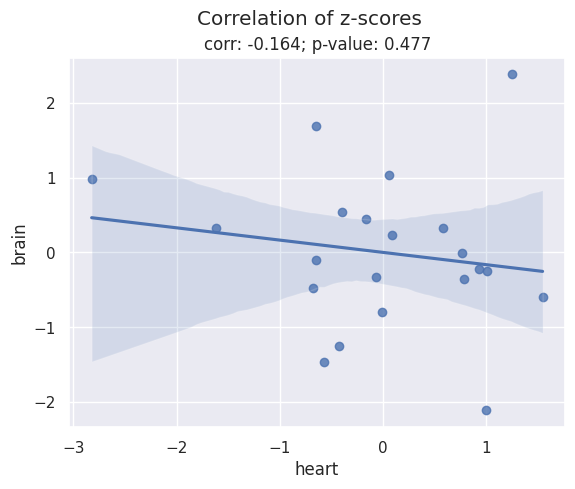

In [3]:
peaks = []
for subject in subjects:
    data = subject.get_qflow()
    if data is None or subject.path is None: continue
    peak_heart = data["heart"].max()
    peak_brain = data["brain"].max()
    peaks.append({
        "heart": peak_heart,
        "brain": peak_brain,
        "subject": subject.path.name
    })
peaks = pd.DataFrame(peaks)
peaks.heart = zscore(peaks.heart)
peaks.brain = zscore(peaks.brain)
corr = pearsonr(peaks.heart, peaks.brain)
sns.regplot(x="heart", y="brain", data=peaks)
plt.title(f"corr: {corr.statistic:.3f}; p-value: {corr.pvalue:.3f}")  # type: ignore
plt.suptitle("Correlation of z-scores")